# I. Problem Statement

## 1.1. Profile

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education wants to select the most promising leads and requires to build a model assigning a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## 1.2. Data

A leads dataset from the past with around 9000 data points. This dataset consists of various attributes which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

## 1.3. Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

# II. Reading and Understanding the Data

## 2.1. Importing Relevant Libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.2. Understanding the dataset

In [2]:
#Read the dataset

lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Determining the number of rows and columns

lead_data.shape

(9240, 37)

In [4]:
#Datatypes of each column

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

All the dataypes of the variables are in correct format.

In [5]:
#Summary of all the numeric columns

lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking missing values

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# III. Data Analysis

## 3.1. Handling the 'Select' level

Since there are many 'Select' values in our dataset, we can convert them to null values. The reason is that some customers did not select any option from the list and 'Select' values are as good as NULL.

In [7]:
#Converting 'Select' values to NaN

lead_data = lead_data.replace('Select', np.nan)

In [8]:
#Checking missing values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## 3.2. Handling null values

In [9]:
#Presenting the null percentages

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
#Dropping unnecessary columns

#We will drop the columns with missing values > 40%

lead_data = lead_data.drop(columns = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [11]:
#Checking the null percentages

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In the next session, we will analyse each of the remaining columns with high missing values

### 3.2.1. Column: 'Country'

This column has 27% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

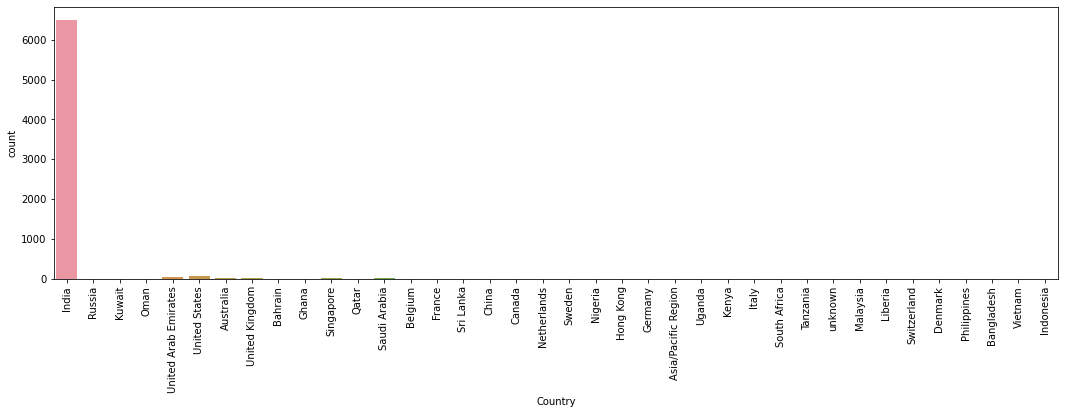

In [12]:
plt.figure(figsize=(18,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)

We can notice that this column contains important piece of information and most values are 'India'. Thus, we can impute missing values with 'India'.

In [13]:
#Imputing the missing data

lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

### 3.2.2. Column: 'Specialization'

This column has 37% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

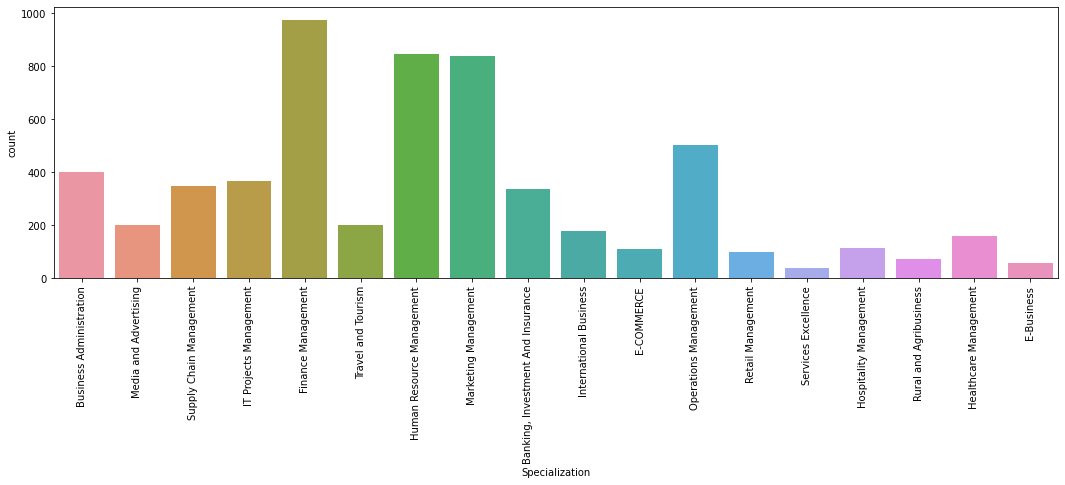

In [14]:
plt.figure(figsize=(18,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)

For those who do not have any specialization such as students or their specializations are not listed in the options list, we can create another category 'Others' for them.

In [15]:
#Creating 'Others'

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan,'Others')

### 3.2.3. Column: 'What is your current occupation'

This column has 29% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

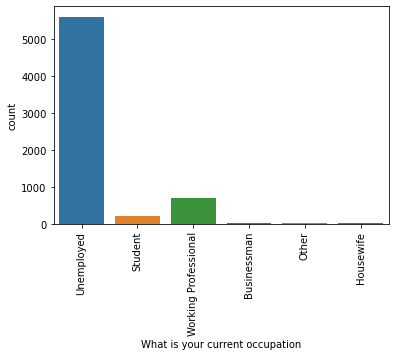

In [16]:
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=90)

We can notice that this column contains important piece of information and most values are 'Unemployed'. Thus, we can impute missing values with 'Unemployed'.

In [17]:
#Imputing the missing data

lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

### 3.2.4. Column: 'What matters most to you in choosing a course'

This column has 29% missing values

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

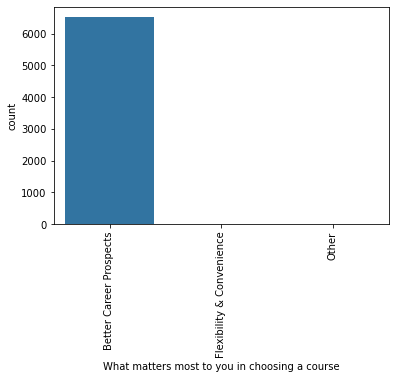

In [18]:
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [19]:
#Finding the percentage of each category

round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

Since 100% of the values fall into only one unique value, we can drop this column.

In [20]:
#Dropping this column

lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

### 3.2.5. Column: 'Tags'

This column has 36% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

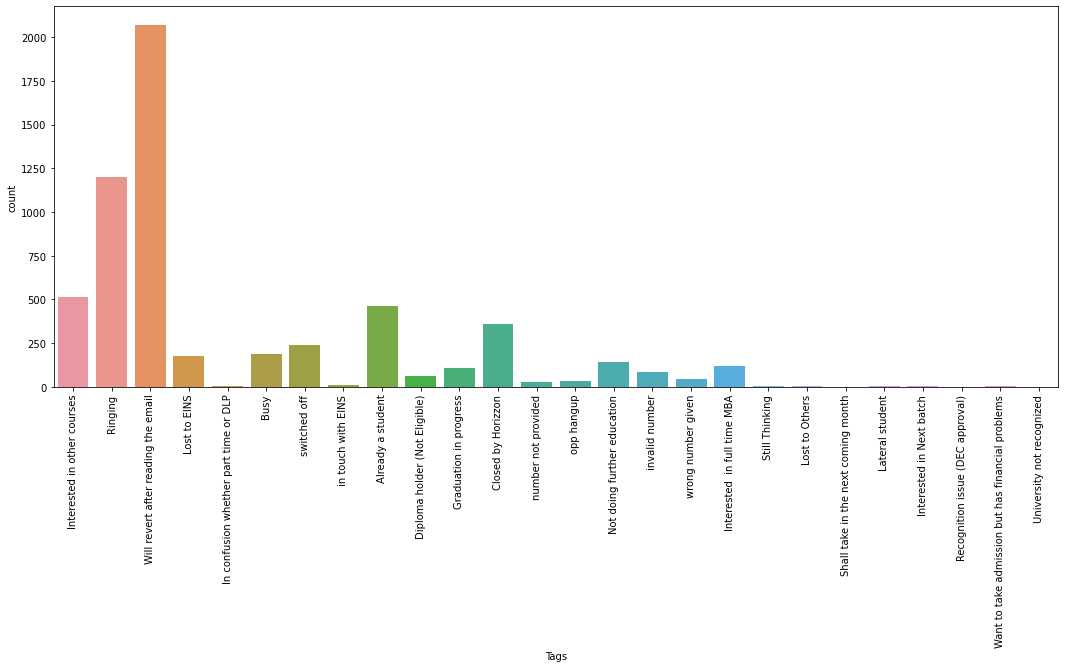

In [21]:
plt.figure(figsize=(18,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)

We can notice that this column contains important piece of information and most values are 'Will revert after reading the email'. Thus, we can impute missing values with 'Will revert after reading the email'.

In [22]:
#Imputing the missing data

lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

### 3.2.6. Column: 'City'

This column has 40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

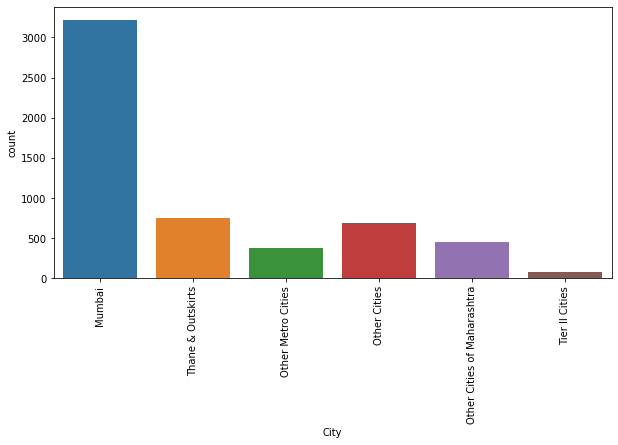

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)

We can notice that this column contains important piece of information and most values are 'Mumbai'. Thus, we can impute missing values with 'Mumbai'.

In [24]:
#Imputing the missing data

lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [25]:
#Checking the null percentages

round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

The rest columns have missing values < 2%. Let's drop these rows.

In [26]:
#Dropping the rows with null values

lead_data.dropna(inplace = True)

In [27]:
#Checking the percentage of rows retained

(len(lead_data.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data.

# IV. Exploratory Data Analysis

## 4.1. Univariate Analysis and Bivariate Analysis

### 4.1.1. Converted

The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted (1) or not (0).

In [28]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

### 4.1.2. Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

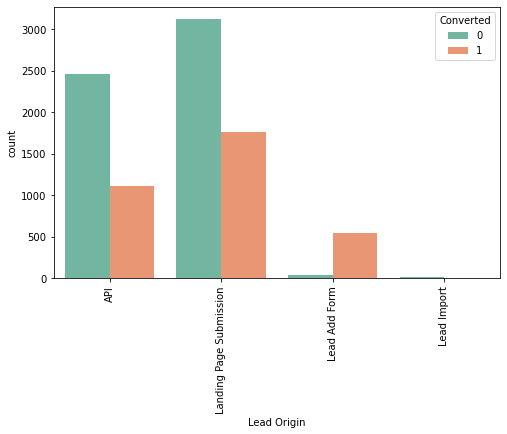

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

**Findings:**

API and Landing Page Submission have around 30-35% conversion rate while the number of lead originated from them are considerable.

Lead Add Form has > 90% conversion rate but the number of lead are not significant.

Lead Import are also not noticeable.

=> To improve the lead conversion rate, X Education should focus on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### 4.1.3. Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

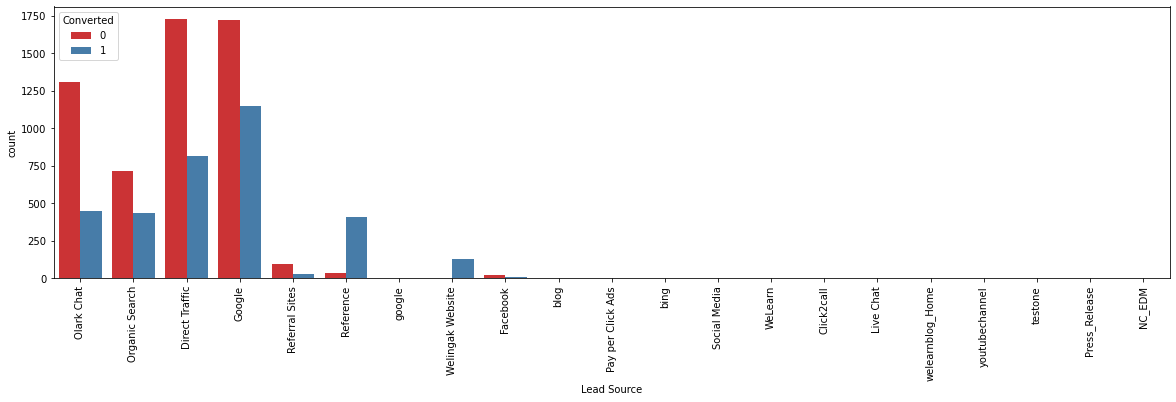

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

We notice that there are two values that need to be unified which are 'Google' and 'google'

In [31]:
#Replacing 'google' with 'Google'

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [32]:
#Creating 'Others' category for Lead Sources which do not have noticeable values

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
 'NC_EDM'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

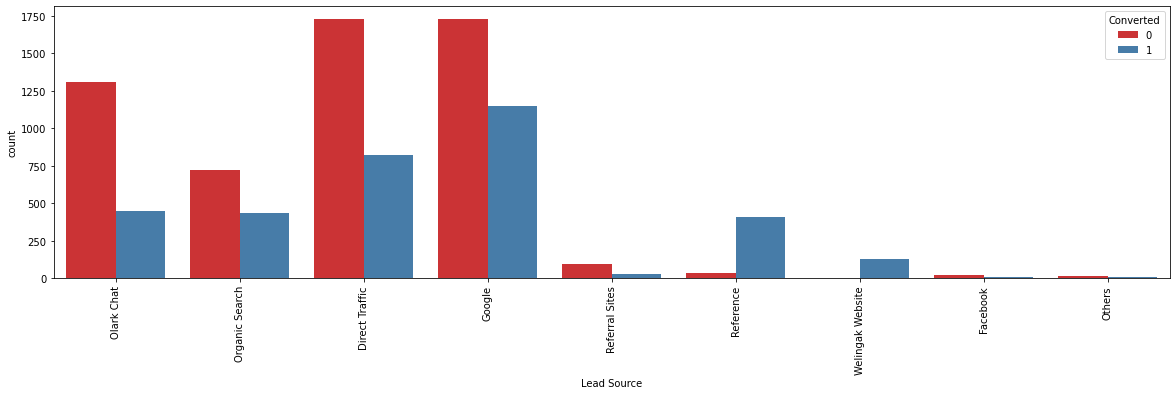

In [33]:
#Visualizing again

plt.figure(figsize=(20,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

**Findings:**

Google and Direct traffic generates most of leads.

Conversion Rate of Reference leads and Welingak Website is high.

=> To improve lead conversion rate, X Education should focus on improving lead conversion of Olark Chat, Organic Search, Direct Traffic, and Google leads and generate more leads from Reference and Welingak Website.

### 4.1.4. Do Not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

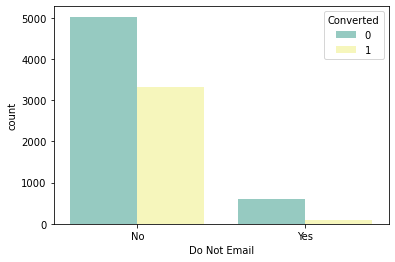

In [34]:
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = lead_data, palette='Set3')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.5. Do Not Call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

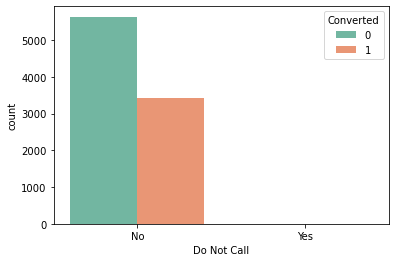

In [35]:
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.6. TotalVisits

<AxesSubplot:xlabel='TotalVisits'>

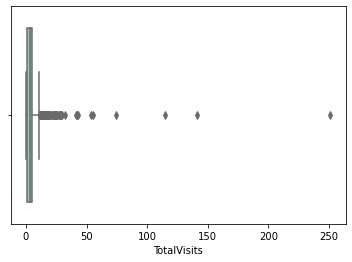

In [36]:
sns.boxplot(lead_data['TotalVisits'], palette='Set3')

There are outliers in the data. Hence, We will cap the outliers to 95% value for analysis.

In [37]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

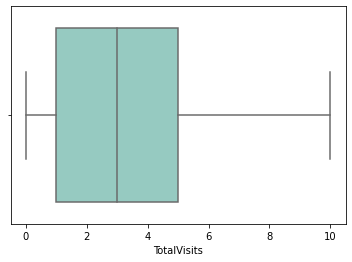

In [38]:
#Visualizing again

sns.boxplot(lead_data['TotalVisits'], palette='Set3')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

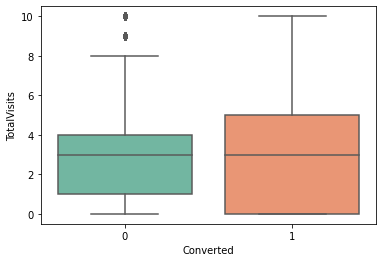

In [39]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data, palette='Set2')

**Findings:**

Median for converted and not converted leads are the same. No conclusion can be drawn base on this parameter.

### 4.1.7. Total Time Spent on Website

<AxesSubplot:xlabel='Total Time Spent on Website'>

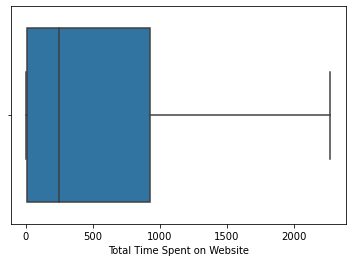

In [40]:
sns.boxplot(lead_data['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

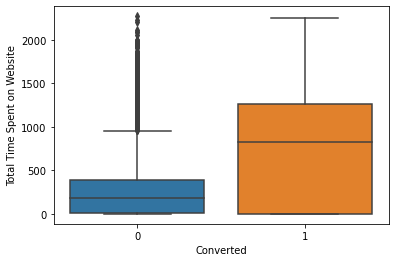

In [41]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)

**Findings:**

Leads spending more time on the website are more likely to be converted.

=> Website should be made more attractive and engaging to make leads spend more time on the website.

### 4.1.8. Page Views Per Visit

<AxesSubplot:xlabel='Page Views Per Visit'>

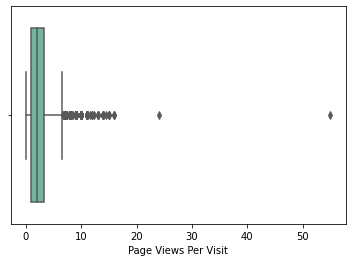

In [42]:
sns.boxplot(lead_data['Page Views Per Visit'], palette='Set2')

There are outliers in the data. Hence, We will cap the outliers to 95% value for analysis.

In [43]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

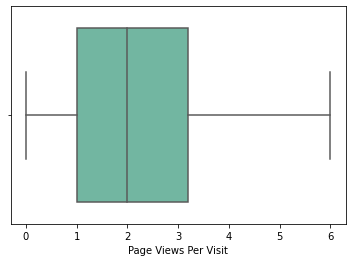

In [44]:
#Visualizing again

sns.boxplot(lead_data['Page Views Per Visit'], palette='Set2')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

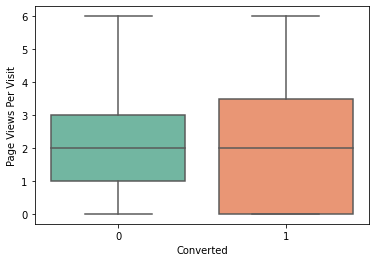

In [45]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data, palette='Set2')

**Findings:**

Median for converted and not converted leads are the same. No conclusion can be drawn base on this parameter.

### 4.1.9. Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

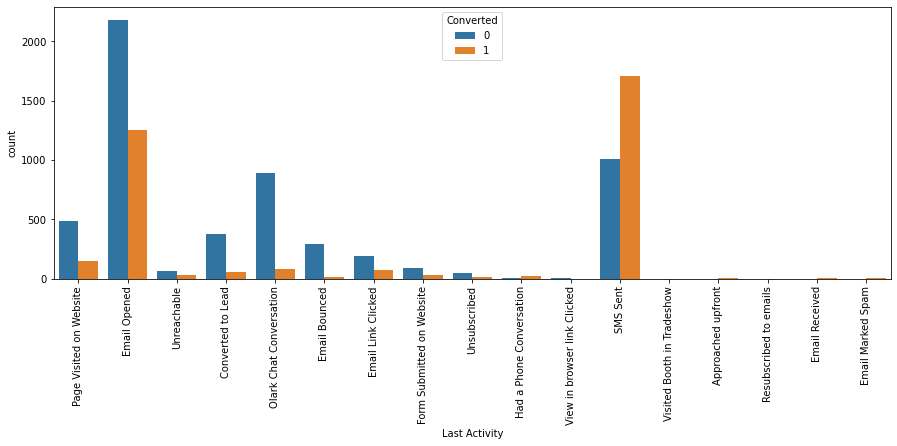

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = lead_data)
plt.xticks(rotation = 90)

In [47]:
#Creating 'Others' category for activities which do not have noticeable values

lead_data['Last Activity'] = lead_data['Last Activity'].replace(['View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'SMS Sent')])

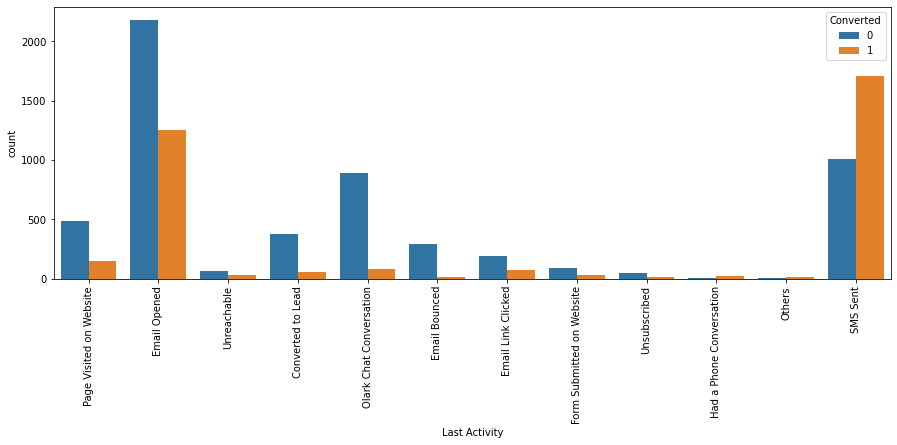

In [48]:
#Visualizing again

plt.figure(figsize=(15,5))
sns.countplot(x = 'Last Activity', hue = 'Converted', data = lead_data)
plt.xticks(rotation = 90)

**Findings:**

Most of the leads' last activity is opening their emails.

Nearly 60% of leads with last activity as SMS Sent is converted.

### 4.1.10. Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

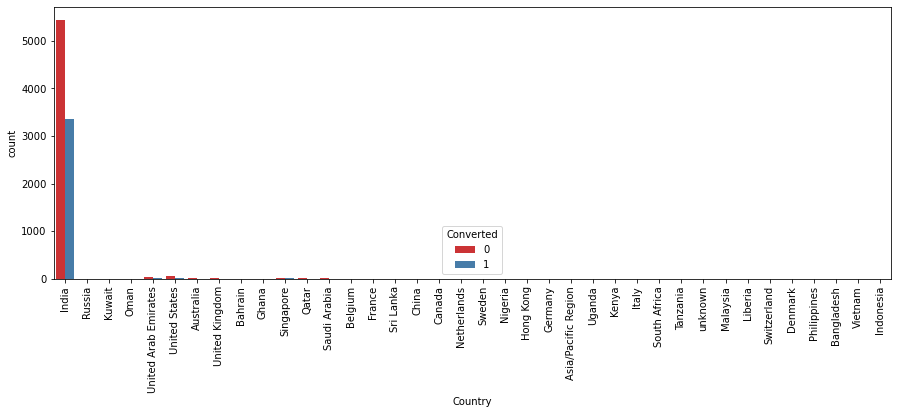

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Country', hue = 'Converted', data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

**Findings:**

Most values are 'India'. No conclusion can be drawn base on this parameter.

### 4.1.11. Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

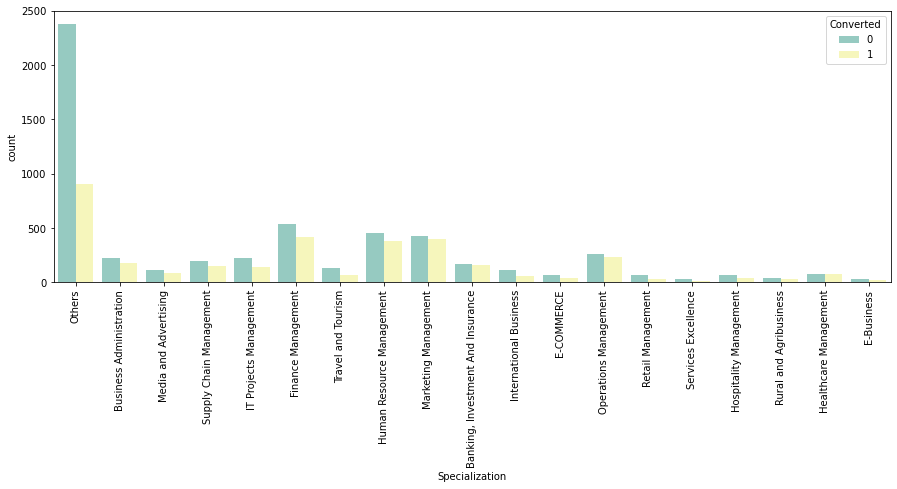

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Specialization', hue = 'Converted', data = lead_data, palette='Set3')
plt.xticks(rotation = 90)

**Findings:**

X Education should pay more attention to Specializations with high conversion. However, there is no significant difference between these parameters.

### 4.1.12. What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

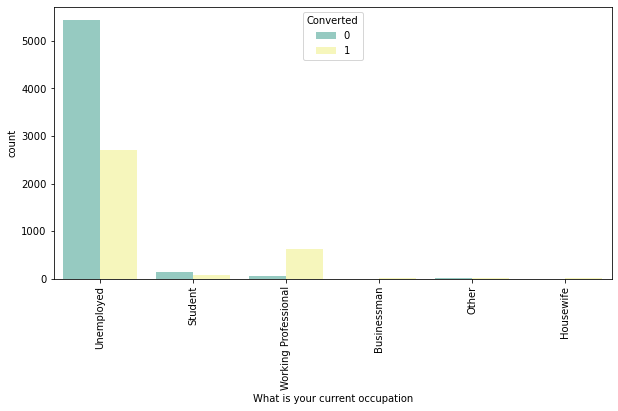

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = lead_data, palette='Set3')
plt.xticks(rotation = 90)

**Findings:**

Working Professionals are more likely to be converted comparing to other categories.

Unemployed leads dominant the dataset; however, it has around solely 30-35% conversion rate.

### 4.1.13. Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

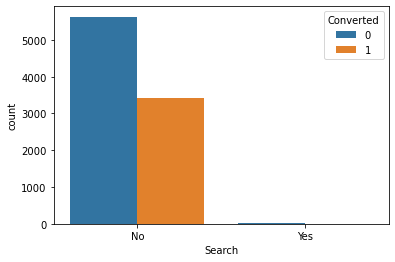

In [52]:
sns.countplot(x = 'Search', hue = 'Converted', data = lead_data)
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.14. Magazine

(array([0]), [Text(0, 0, 'No')])

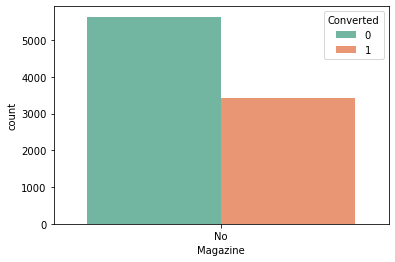

In [53]:
sns.countplot(x = 'Magazine', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.15. Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

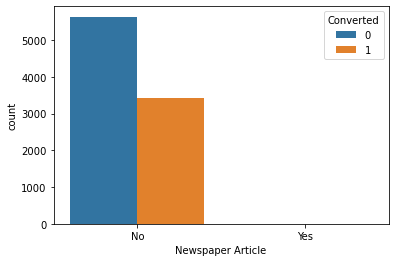

In [54]:
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = lead_data)
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.16. X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

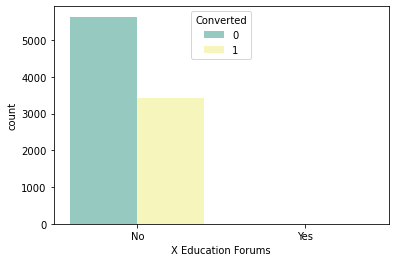

In [55]:
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = lead_data, palette='Set3')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.17. Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

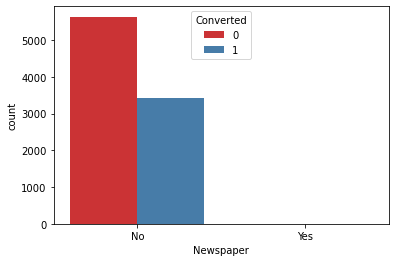

In [56]:
sns.countplot(x = 'Newspaper', hue = 'Converted', data = lead_data, palette='Set1')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.18. Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

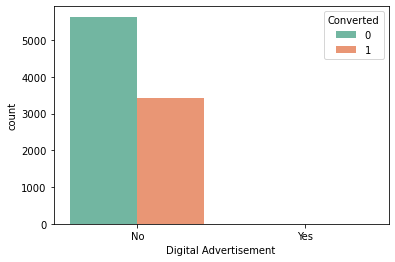

In [57]:
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.19. Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

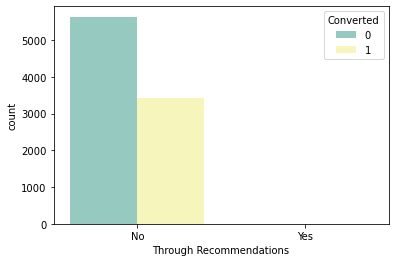

In [58]:
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = lead_data, palette='Set3')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.20. Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

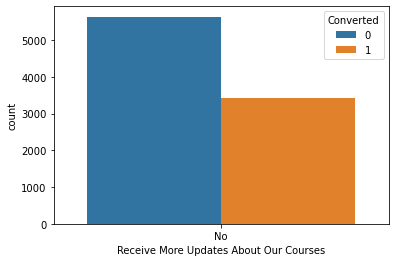

In [59]:
sns.countplot(x = 'Receive More Updates About Our Courses', hue = 'Converted', data = lead_data)
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.21. Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

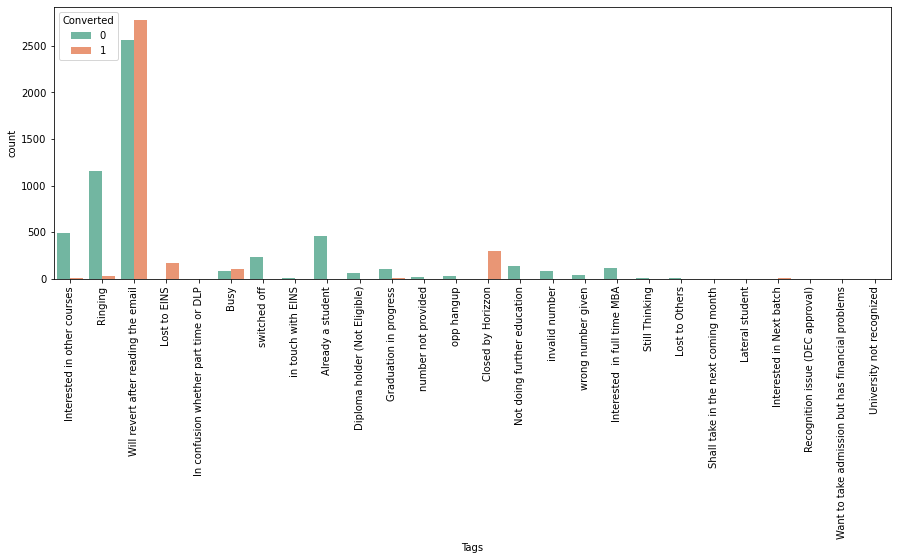

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

In [61]:
#Creating 'Others' category for Tags which do not have noticeable values

lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DL', 'in touch with EINS', 'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)', 'Want to take admission but has financial problems', 'University not recognized'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA')])

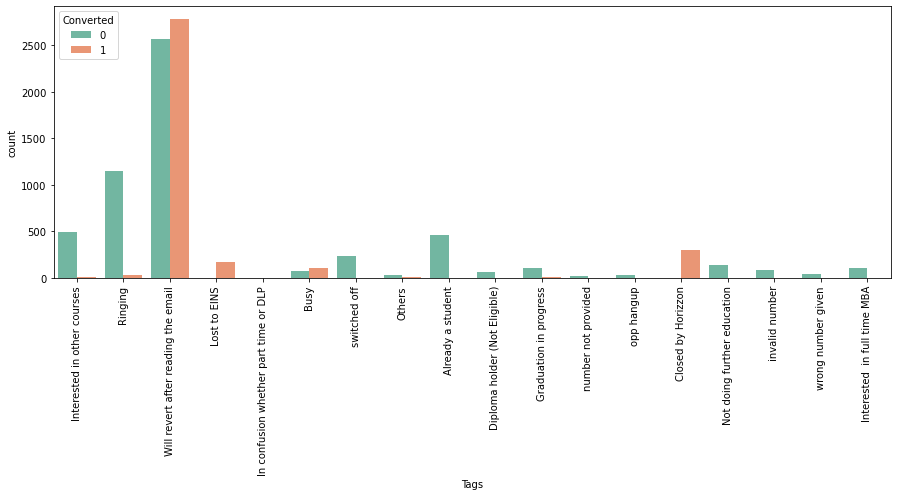

In [62]:
#Visualizing again

plt.figure(figsize=(15,5))
sns.countplot(x = 'Tags', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

**Findings:**

This is not available for model building as they are notes by sales team for tracking. Thus, we will drop this column before building the model.

### 4.1.22. Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

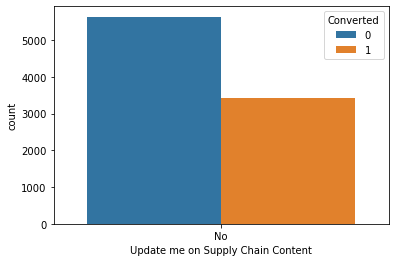

In [63]:
sns.countplot(x = 'Update me on Supply Chain Content', hue = 'Converted', data = lead_data)
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.23. Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

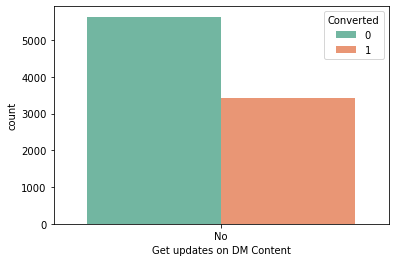

In [64]:
sns.countplot(x = 'Get updates on DM Content', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.24. City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

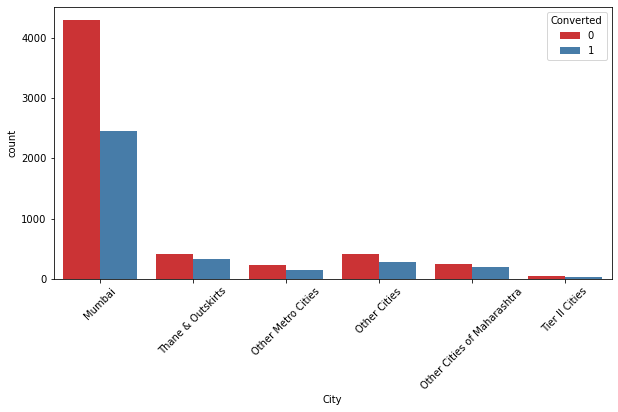

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'City', hue = 'Converted', data = lead_data, palette='Set1')
plt.xticks(rotation = 45)

**Findings:**

Most leads are from Mumbai with nearly 40% conversion rate.

### 4.1.25. I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

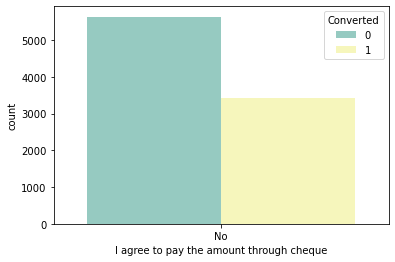

In [66]:
sns.countplot(x = 'I agree to pay the amount through cheque', hue = 'Converted', data = lead_data, palette='Set3')
plt.xticks()

**Findings:**

Most entries are 'No'. No conclusion can be drawn base on this parameter.

### 4.1.26. A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

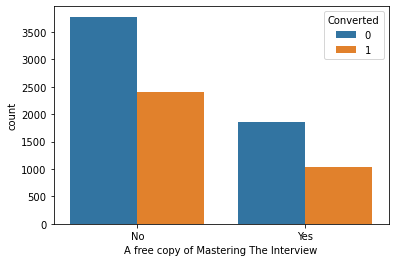

In [67]:
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = lead_data)
plt.xticks()

No significant conclusion can be drawn base on this parameter.

### 4.1.27. Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

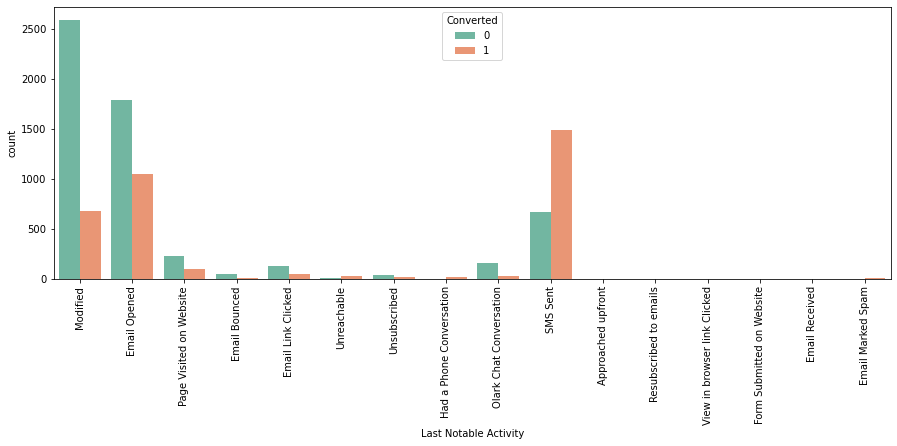

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

In [69]:
#Creating 'Others' category for Last Notable Activity which do not have noticeable values

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received', 'Email Marked Spam'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Others')])

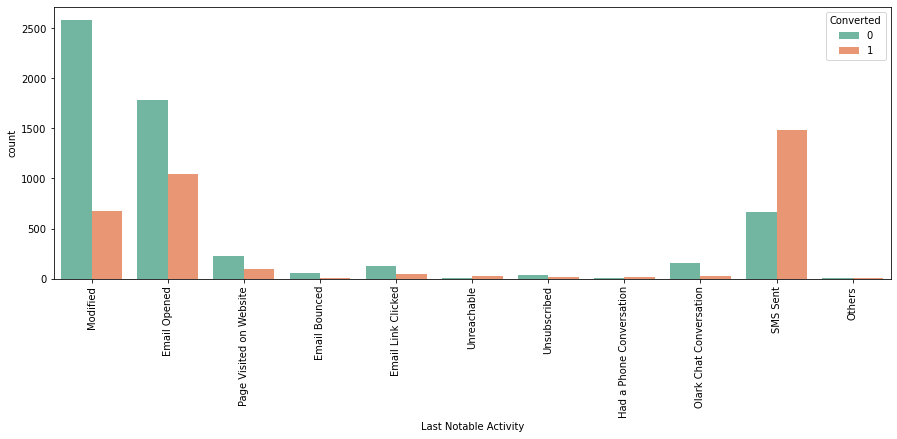

In [70]:
#Visualizing again

plt.figure(figsize=(15,5))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

**Findings:**

Most leads came from Modified or Opened Email as their last notable activities.
Leads which received SMS has high conversion rate at about 65%.

From the above-mentioned Univariate Analysis and Bivariate Analysis, we notice that some columns do not have statistic values. Therefore, we can drop them for our best model in later analysis.

In [71]:
#Removing columns are not adding any information to the model

lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'],1)

In [72]:
#Determining the number of rows and columns again

lead_data.shape

(9074, 14)

In [73]:
#Datatypes of remaining columns

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## 4.2. Data Preparation

### 4.2.1. Converting binary variables

In this part, we will convert Yes/No values to 1/0

In [74]:
vars = ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

### 4.2.2. Handling Dummy variables

We will create dummy variables for 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', and 'Last Notable Activity'

In [75]:
#Creating dummy variables

dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'City', 'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
#Concatenating the dummy data to the dataframe

lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [77]:
#Dropping dummy-created columns

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation', 'City','Last Notable Activity'], axis = 1)
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### 4.2.3. Splitting the data into train and test set

In [78]:
from sklearn.model_selection import train_test_split

x = lead_data.drop(['Prospect ID','Converted'], axis=1)
x.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [79]:
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
#Splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.2.4. Rescaling the Features

For the model to be easily interpretable, all variables must be on the same scale. We can use standardization or normalizing to ensure that the units of the computed coefficients are all on the same scale.

- Min-Max scaling (Normalisation): Between 0 and 1
- Standardisation: mean-0, sigma-1

The benefit of Standardisation over Min-Max scaling is that it does not compress the data between a specific range. This is helpful, especially if there is an outlier data point. Because our dataset no longer contain significant outliers, we'll use Normalisation.

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
#Checking the Lead Conversion rate again

Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

# V. Building Model

## 5.1. SciKit Learn LogisticRegression

We will use the SciKit Learn LogisticRegression function for its compatibility with RFE (Recursive Feature Elimination - a utility from sklearn).

In [83]:
# Importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [84]:
# Running RFE with the output number of the variable equal to 20

lm = LogisticRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)
rfe = rfe.fit(x_train, y_train)

In [85]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False])

In [86]:
#List of variables selected

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 14),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 34),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False

In [87]:
#Columns where RFE support is True

cols = x_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [88]:
#Columns where RFE support is False

x_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Ret

## 5.2. Building model using statsmodel

### Model 1

In [89]:
#Creating x_test dataframe with RFE selected variables

x_train_sm = x_train[cols]

In [90]:
#Adding a constant variable

import statsmodels.api as sm  
x_train_sm = sm.add_constant(x_train_sm)

In [91]:
#Running the linear model

lm1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
result = lm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.5
Date:                Tue, 28 Feb 2023   Deviance:                       5181.0
Time:                        23:57:23   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3532      0.245      1.444      0.149      -0.126       0.833
Do Not Email                                            -1.6739      0.190     -8.796      0.000      -2.047      -1.301
Total Time Spent on Website                              1.1085      0.041     27.204      0.000       1.029       1.188
Lead Origin_Landing Page Submission                     -1.1286      0.129     -8.732      0.000      -1.382      -0.875
Lead Origin_Lead Add Form                                1.5991      0.915      1.748      0.080      -0.193       3.392
Lead Origin_Lead Import                                  0.9028      0.480      1.881      0.060      -0.038       1.844
Lead Source_Olark Chat                                   1.1249      0.124      9.077      0.000       0.882       1.368
Lead Source_Reference                                    1.7717      0.938      1.889      0.059      -0.066       3.610
Lead Source_Welingak Website                             4.2995      1.165      3.690      0.000       2.016       6.583
Last Activity_Had a Phone Conversation                   2.4056      1.156      2.080      0.038       0.139       4.672
Last Activity_Olark Chat Conversation                   -0.9507      0.172     -5.535      0.000      -1.287      -0.614
Last Activity_Others                                     1.7204      0.602      2.856      0.004       0.540       2.901
Last Activity_SMS Sent                                   1.3450      0.076     17.759      0.000       1.197       1.493
Last Activity_Unsubscribed                               1.4062      0.483      2.912      0.004       0.460       2.353
Specialization_Others                                   -1.1484      0.126     -9.124      0.000      -1.395      -0.902
What is your current occupation_Housewife               22.2453   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Unemployed              -0.5192      0.218     -2.383      0.017      -0.946      -0.092
What is your current occupation_Working Professional     2.1159      0.287      7.370      0.000       1.553       2.679
Last Notable Activity_Had a Phone Conversation           0.8863      1.596      0.555      0.579      -2.241       4.014
Last Notable Activity_Modified                          -0.8665      0.082    -10.613      0.000      -1.027      -0.707
Last Notable Activity_Unreachable                        1.5824      0.475      3.329      0.001       0.651       2.514
========================================================================================================================
"""

We can notie that the P-value of 'What is your current occupation_Housewife' is significant, we can drop this column.

In [92]:
#Dropping column

col1 = cols.drop('What is your current occupation_Housewife')

### Model 2

In [93]:
x_train_sm = sm.add_constant(x_train[col1])
lm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result2 = lm2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.6
Date:                Tue, 28 Feb 2023   Deviance:                       5187.1
Time:                        23:57:23   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4371      0.240      1.820      0.069      -0.034       0.908
Do Not Email                                            -1.6766      0.190     -8.812      0.000      -2.050      -1.304
Total Time Spent on Website                              1.1077      0.041     27.208      0.000       1.028       1.187
Lead Origin_Landing Page Submission                     -1.1279      0.129     -8.734      0.000      -1.381      -0.875
Lead Origin_Lead Add Form                                1.5989      0.914      1.748      0.080      -0.193       3.391
Lead Origin_Lead Import                                  0.9017      0.480      1.879      0.060      -0.039       1.842
Lead Source_Olark Chat                                   1.1225      0.124      9.061      0.000       0.880       1.365
Lead Source_Reference                                    1.7805      0.938      1.899      0.058      -0.057       3.618
Lead Source_Welingak Website                             4.3008      1.165      3.691      0.000       2.017       6.584
Last Activity_Had a Phone Conversation                   2.4072      1.156      2.082      0.037       0.141       4.674
Last Activity_Olark Chat Conversation                   -0.9527      0.172     -5.545      0.000      -1.289      -0.616
Last Activity_Others                                     1.7211      0.602      2.857      0.004       0.540       2.902
Last Activity_SMS Sent                                   1.3431      0.076     17.734      0.000       1.195       1.492
Last Activity_Unsubscribed                               1.4079      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1504      0.126     -9.146      0.000      -1.397      -0.904
What is your current occupation_Unemployed              -0.6010      0.213     -2.822      0.005      -1.018      -0.184
What is your current occupation_Working Professional     2.0330      0.283      7.176      0.000       1.478       2.588
Last Notable Activity_Had a Phone Conversation           0.8817      1.596      0.553      0.581      -2.245       4.009
Last Notable Activity_Modified                          -0.8683      0.082    -10.639      0.000      -1.028      -0.708
Last Notable Activity_Unreachable                        1.5799      0.475      3.323      0.001       0.648       2.512
========================================================================================================================
"""

We can notie that the P-value of 'Last Notable Activity_Had a Phone Conversation' is significant, we can drop this column.

In [94]:
col2 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model 3

In [95]:
x_train_sm = sm.add_constant(x_train[col2])
lm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result3 = lm3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.7
Date:                Tue, 28 Feb 2023   Deviance:                       5187.4
Time:                        23:57:23   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4032
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4377      0.240      1.823      0.068      -0.033       0.908
Do Not Email                                            -1.6784      0.190     -8.823      0.000      -2.051      -1.306
Total Time Spent on Website                              1.1074      0.041     27.203      0.000       1.028       1.187
Lead Origin_Landing Page Submission                     -1.1276      0.129     -8.733      0.000      -1.381      -0.875
Lead Origin_Lead Add Form                                1.5990      0.915      1.748      0.080      -0.193       3.391
Lead Origin_Lead Import                                  0.9019      0.480      1.879      0.060      -0.039       1.843
Lead Source_Olark Chat                                   1.1233      0.124      9.067      0.000       0.880       1.366
Lead Source_Reference                                    1.7811      0.938      1.899      0.058      -0.057       3.619
Lead Source_Welingak Website                             4.3024      1.165      3.692      0.000       2.019       6.586
Last Activity_Had a Phone Conversation                   2.9067      0.761      3.820      0.000       1.415       4.398
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.537      0.000      -1.288      -0.615
Last Activity_Others                                     1.7223      0.602      2.859      0.004       0.541       2.903
Last Activity_SMS Sent                                   1.3431      0.076     17.732      0.000       1.195       1.492
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1522      0.126     -9.163      0.000      -1.399      -0.906
What is your current occupation_Unemployed              -0.6007      0.213     -2.820      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0332      0.283      7.176      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8706      0.082    -10.678      0.000      -1.030      -0.711
Last Notable Activity_Unreachable                        1.5791      0.475      3.321      0.001       0.647       2.511
========================================================================================================================
"""

We can notie that the P-value of 'Lead Origin_Lead Add Form' is significant, we can drop this column.

In [96]:
col3 = col2.drop('Lead Origin_Lead Add Form')

### Model 4

In [97]:
x_train_sm = sm.add_constant(x_train[col3])
lm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result4 = lm4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.4
Date:                Tue, 28 Feb 2023   Deviance:                       5190.8
Time:                        23:57:24   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4029
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4546      0.240      1.894      0.058      -0.016       0.925
Do Not Email                                            -1.6801      0.190     -8.832      0.000      -2.053      -1.307
Total Time Spent on Website                              1.1053      0.041     27.197      0.000       1.026       1.185
Lead Origin_Landing Page Submission                     -1.1459      0.129     -8.896      0.000      -1.398      -0.893
Lead Origin_Lead Import                                  0.8851      0.480      1.843      0.065      -0.056       1.826
Lead Source_Olark Chat                                   1.1163      0.124      9.030      0.000       0.874       1.359
Lead Source_Reference                                    3.3652      0.243     13.855      0.000       2.889       3.841
Lead Source_Welingak Website                             5.8918      0.730      8.076      0.000       4.462       7.322
Last Activity_Had a Phone Conversation                   2.9018      0.761      3.813      0.000       1.410       4.393
Last Activity_Olark Chat Conversation                   -0.9556      0.172     -5.564      0.000      -1.292      -0.619
Last Activity_Others                                     1.7194      0.602      2.855      0.004       0.539       2.900
Last Activity_SMS Sent                                   1.3431      0.076     17.736      0.000       1.195       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.917      0.004       0.462       2.354
Specialization_Others                                   -1.1640      0.126     -9.265      0.000      -1.410      -0.918
What is your current occupation_Unemployed              -0.5977      0.213     -2.806      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0330      0.283      7.173      0.000       1.478       2.588
Last Notable Activity_Modified                          -0.8711      0.081    -10.689      0.000      -1.031      -0.711
Last Notable Activity_Unreachable                        1.5745      0.475      3.311      0.001       0.643       2.506
========================================================================================================================
"""

We can notie that the P-value of 'Lead Origin_Lead Import' is significant (> 0.05), we can drop this column.

In [98]:
col4 = col3.drop('Lead Origin_Lead Import')

### Model 5

In [99]:
x_train_sm = sm.add_constant(x_train[col4])
lm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result5 = lm5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Tue, 28 Feb 2023   Deviance:                       5193.9
Time:                        23:57:24   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4896      0.239      2.046      0.041       0.021       0.959
Do Not Email                                            -1.6816      0.190     -8.843      0.000      -2.054      -1.309
Total Time Spent on Website                              1.0981      0.040     27.198      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1810      0.128     -9.255      0.000      -1.431      -0.931
Lead Source_Olark Chat                                   1.0909      0.123      8.894      0.000       0.850       1.331
Lead Source_Reference                                    3.3317      0.242     13.758      0.000       2.857       3.806
Lead Source_Welingak Website                             5.8680      0.729      8.044      0.000       4.438       7.298
Last Activity_Had a Phone Conversation                   2.8894      0.761      3.797      0.000       1.398       4.381
Last Activity_Olark Chat Conversation                   -0.9606      0.172     -5.594      0.000      -1.297      -0.624
Last Activity_Others                                     1.7139      0.602      2.848      0.004       0.535       2.893
Last Activity_SMS Sent                                   1.3403      0.076     17.712      0.000       1.192       1.489
Last Activity_Unsubscribed                               1.4033      0.482      2.911      0.004       0.458       2.348
Specialization_Others                                   -1.1853      0.125     -9.447      0.000      -1.431      -0.939
What is your current occupation_Unemployed              -0.5928      0.213     -2.783      0.005      -1.010      -0.175
What is your current occupation_Working Professional     2.0378      0.283      7.193      0.000       1.483       2.593
Last Notable Activity_Modified                          -0.8713      0.081    -10.697      0.000      -1.031      -0.712
Last Notable Activity_Unreachable                        1.5639      0.475      3.290      0.001       0.632       2.496
========================================================================================================================
"""

- All of the variables have p-values less than 0.05.

- Let's check VIFs before deciding whether to keep or drop these variables.

## 5.3. Checking VIF

The Variance Inflation Factor (VIF) provides a simple quantitative estimate of how strongly the feature variables are associated with one another. It is a critical parameter for testing our linear model. VIF is calculated using the following formula:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = x_train[col4].columns
vif['VIF'] = [variance_inflation_factor(x_train[col4].values, i) for i in range(x_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.57
2,Lead Origin_Landing Page Submission,5.67
11,Specialization_Others,3.98
3,Lead Source_Olark Chat,2.22
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.64
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
4,Lead Source_Reference,1.45
1,Total Time Spent on Website,1.31


As we can notice, 'What is your current occupation_Unemployed' variable has VIF ~ 10 (insignificant variable), thus we can drop it.

In [101]:
col5 = col4.drop('What is your current occupation_Unemployed')

### Model 6

In [102]:
x_train_sm = sm.add_constant(x_train[col5])
lm6 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result6 = lm6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.7
Date:                Tue, 28 Feb 2023   Deviance:                       5201.5
Time:                        23:57:24   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4019
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0751      0.126     -0.597      0.551      -0.322       0.171
Do Not Email                                            -1.6778      0.190     -8.813      0.000      -2.051      -1.305
Total Time Spent on Website                              1.0983      0.040     27.217      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1850      0.128     -9.280      0.000      -1.435      -0.935
Lead Source_Olark Chat                                   1.0968      0.123      8.942      0.000       0.856       1.337
Lead Source_Reference                                    3.3437      0.242     13.827      0.000       2.870       3.818
Lead Source_Welingak Website                             5.8603      0.729      8.035      0.000       4.431       7.290
Last Activity_Had a Phone Conversation                   2.8698      0.761      3.771      0.000       1.378       4.361
Last Activity_Olark Chat Conversation                   -0.9519      0.172     -5.550      0.000      -1.288      -0.616
Last Activity_Others                                     1.6974      0.602      2.818      0.005       0.517       2.878
Last Activity_SMS Sent                                   1.3254      0.075     17.590      0.000       1.178       1.473
Last Activity_Unsubscribed                               1.3783      0.482      2.859      0.004       0.433       2.323
Specialization_Others                                   -1.1971      0.126     -9.528      0.000      -1.443      -0.951
What is your current occupation_Working Professional     2.6117      0.195     13.405      0.000       2.230       2.994
Last Notable Activity_Modified                          -0.8782      0.081    -10.787      0.000      -1.038      -0.719
Last Notable Activity_Unreachable                        1.5486      0.474      3.267      0.001       0.620       2.478
========================================================================================================================
"""

In [103]:
#Check VIF again

vif = pd.DataFrame()
vif['Features'] = x_train[col5].columns
vif['VIF'] = [variance_inflation_factor(x_train[col5].values, i) for i in range(x_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
13,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
7,Last Activity_Olark Chat Conversation,1.59
9,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
12,What is your current occupation_Working Profes...,1.19


At this point, we acknowledge that there are variables that does not add much values to our analysis and target variable - ‘Converted’. Hence, we can drop 'Specialization_Others', 'Last Activity_Unsubscribed', 'Last Activity_Others', 'Last Notable Activity_Unreachable' to simplify our model.

In [104]:
col6 = col5.drop('Last Activity_Unsubscribed')
col6 = col6.drop('Last Notable Activity_Unreachable')
col6 = col6.drop('Specialization_Others')
col6 = col6.drop('Last Activity_Others')

### Model 7

In [105]:
x_train_sm = sm.add_constant(x_train[col6])
lm7 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
result7 = lm7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.4
Date:                Tue, 28 Feb 2023   Deviance:                       5322.8
Time:                        23:57:24   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9320      0.083    -11.198      0.000      -1.095      -0.769
Do Not Email                                            -1.5088      0.173     -8.716      0.000      -1.848      -1.170
Total Time Spent on Website                              1.1225      0.040     28.112      0.000       1.044       1.201
Lead Origin_Landing Page Submission                     -0.3193      0.087     -3.662      0.000      -0.490      -0.148
Lead Source_Olark Chat                                   1.0094      0.118      8.534      0.000       0.778       1.241
Lead Source_Reference                                    3.7533      0.237     15.825      0.000       3.288       4.218
Lead Source_Welingak Website                             5.6132      0.726      7.728      0.000       4.190       7.037
Last Activity_Had a Phone Conversation                   2.8682      0.749      3.827      0.000       1.399       4.337
Last Activity_Olark Chat Conversation                   -1.0536      0.167     -6.310      0.000      -1.381      -0.726
Last Activity_SMS Sent                                   1.2521      0.074     16.920      0.000       1.107       1.397
What is your current occupation_Working Professional     2.7765      0.188     14.752      0.000       2.408       3.145
Last Notable Activity_Modified                          -0.8976      0.080    -11.238      0.000      -1.054      -0.741
========================================================================================================================
"""

In [106]:
#Check VIF again

vif = pd.DataFrame()
vif['Features'] = x_train[col6].columns
vif['VIF'] = [variance_inflation_factor(x_train[col6].values, i) for i in range(x_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.64
2,Lead Origin_Landing Page Submission,1.63
3,Lead Source_Olark Chat,1.60
7,Last Activity_Olark Chat Conversation,1.55
8,Last Activity_SMS Sent,1.47
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.23
9,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13
5,Lead Source_Welingak Website,1.05


Final model:

The VIFs and p-values are both within acceptable limits. Hence, we proceed to generate predictions using this model.

- For each term, the p-value tests the null hypothesis that the coefficient is less than 0.05. A low p-value (< 0.05) suggests that the null hypothesis may be rejected.

- Generally, if a VIF is more than 10, we have strong multicollinearity. In our scenario, VIFs < 5 indicate that we are in good shape and may continue with our regression.

- Model 7 is our final model. We have 11 variables in our final model.

# VI. Making Predictions

In [107]:
# Getting the predicted values on the train set

y_train_pred = result7.predict(x_train_sm)
y_train_pred[:10]

3009    0.192911
1012    0.356683
9226    0.362261
4750    0.863577
7987    0.797034
1281    0.736874
2880    0.096166
4971    0.921078
7536    0.861137
1248    0.766506
dtype: float64

In [108]:
#Reshaping into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19291056, 0.35668335, 0.36226125, 0.86357704, 0.79703366,
       0.73687416, 0.09616618, 0.92107792, 0.86113717, 0.76650587])

In [109]:
#Creating a dataframe with Converted and the predicted probabilities

y_train_pred_result = pd.DataFrame({'Converted':y_train.values, 'Probability':y_train_pred})
y_train_pred_result['Prospect ID'] = y_train.index
y_train_pred_result.head()

,Converted,Probability,Prospect ID
0,0,0.192911,3009
1,0,0.356683,1012
2,0,0.362261,9226
3,1,0.863577,4750
4,1,0.797034,7987


We'll next choose a sample cut-off probability to find the predicted labels - let's say 0.5

In [110]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_result['Predicted'] = y_train_pred_result.Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_result.head()

,Converted,Probability,Prospect ID,Predicted
0,0,0.192911,3009,0
1,0,0.356683,1012,0
2,0,0.362261,9226,0
3,1,0.863577,4750,1
4,1,0.797034,7987,1


## 6.1. Making the Confusion Matrix

In [111]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_train_pred_result.Converted, y_train_pred_result.Predicted)
print(cm)

[[3482  423]
 [ 755 1691]]


In other words, the confusion matrix illustrates:

Predicted     not_converted    converted
Actual
not_converted        3461      444
converted            719       1727  

In [112]:
#Checking the overall accuracy

print('Accuracy:', metrics.accuracy_score(y_train_pred_result.Converted, y_train_pred_result.Predicted))

Accuracy: 0.8145173988348292


Now, let's look at other relevant metrics

In [113]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [114]:
#Sensitivity of logistic regression model

print('Sensitivity: ',TP/float(TP+FN))

Sensitivity:  0.6913327882256746


In [115]:
#Specificity of logistic regression model

print('Specificity: ', TN/float(TN+FP))

Specificity:  0.8916773367477593


Our specificity was good (~89%) but sensitivity was only well-under 70%. This is due to our initial chosen cut-off point of 0.5. In the next part, we will use ROC curve to optimize sensitivity as:

- It shows the tradeoff between sensitivity and specificity
- It depicts how accurate the test is

## 6.2. Plotting the ROC Curve

In [116]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_result.Converted, y_train_pred_result.Probability, drop_intermediate = False )

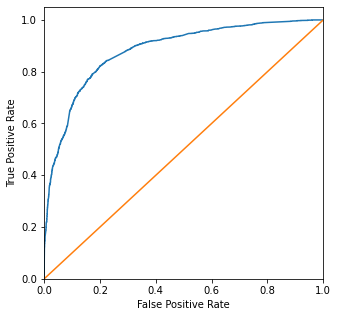

In [118]:
draw_roc(y_train_pred_result.Converted, y_train_pred_result.Probability)

As our ROC curve is close to the left-hand and top border, our model is good, and the test is accurate.

Let's find the optimal cut-off probability where there is balanced sensitivity and specificity.

## 6.3. Find optimal cut-off probability

In [119]:
#Testing different probability cut-offs

n = [float(x)/10 for x in range(10)]
for i in n:
    y_train_pred_result[i]= y_train_pred_result.Probability.map(lambda x: 1 if x > i else 0)

y_train_pred_result.head()

,Converted,Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192911,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.356683,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.362261,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.863577,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797034,7987,1,1,1,1,1,1,1,1,1,0,0


In [120]:
#Calculating accuracy, sensitivity, and specificity for different probability cut-offs

cutoff_data = pd.DataFrame(columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

cutoffs = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cutoffs:
    cm2 = metrics.confusion_matrix(y_train_pred_result.Converted, y_train_pred_result[i])
    total = sum(sum(cm2))
    accuracy = (cm2[0,0]+cm2[1,1])/total
    specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
    sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
    cutoff_data.loc[i] =[i, accuracy, sensitivity, specificity]
print(cutoff_data)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.587939     0.971791     0.347503
0.2          0.2  0.743820     0.912510     0.638156
0.3          0.3  0.802551     0.838921     0.779770
0.4          0.4  0.814517     0.762061     0.847375
0.5          0.5  0.814517     0.691333     0.891677
0.6          0.6  0.789954     0.582584     0.919846
0.7          0.7  0.778460     0.511447     0.945711
0.8          0.8  0.757204     0.413737     0.972343
0.9          0.9  0.709337     0.262878     0.988988


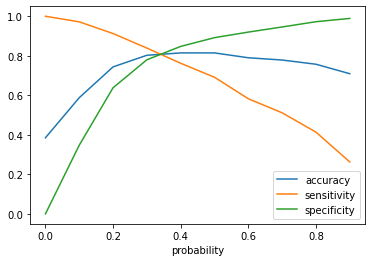

In [121]:
#Plotting charts

cutoff_data.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

The chart suggests that the optimal cut-off probability should be about 0.35

In [122]:
y_train_pred_result['Final_prediction'] = y_train_pred_result.Probability.map(lambda x:1 if x > 0.35 else 0)
y_train_pred_result.head()

,Converted,Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_prediction
0,0,0.192911,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.356683,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.362261,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.863577,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797034,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [123]:
#Assigning Lead Score to the Training data

y_train_pred_result['Score'] = y_train_pred_result.Probability.map(lambda x: round(x*100))
y_train_pred_result.head()

,Converted,Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_prediction,Score
0,0,0.192911,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.356683,1012,0,1,1,1,1,0,0,0,0,0,0,1,36
2,0,0.362261,9226,0,1,1,1,1,0,0,0,0,0,0,1,36
3,1,0.863577,4750,1,1,1,1,1,1,1,1,1,1,0,1,86
4,1,0.797034,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


# VII. Model Evaluation

## 7.1. Evaluation metrics

In [124]:
#Checking the overall accuracy again

print('Accuracy: ', metrics.accuracy_score(y_train_pred_result.Converted, y_train_pred_result.Final_prediction))

Accuracy:  0.8090064556762715


In [125]:
#Checking confusion matrix again

cm2 = metrics.confusion_matrix(y_train_pred_result.Converted, y_train_pred_result.Final_prediction)
cm2

array([[3172,  733],
       [ 480, 1966]])

In [126]:
TP2 = cm2[1,1] # true positive 
TN2 = cm2[0,0] # true negatives
FP2 = cm2[0,1] # false positives
FN2 = cm2[1,0] # false negatives

In [127]:
#Sensitivity of logistic regression model

print('Sensitivity: ', TP2/float(TP2+FN2))

Sensitivity:  0.803761242845462


In [128]:
#Specificity of logistic regression model

print('Specificity: ', TN2/float(TN2+FP2))

Specificity:  0.812291933418694


In [129]:
#False postive rate of logistic regression model

print('False Positive rate: ', FP2/float(TN2+FP2))

False Positive rate:  0.187708066581306


In [130]:
#Positive predictive value of logistic regression model

print('Positive Predictive Value: ', TP2/float(TP2+FP2))

Positive Predictive Value:  0.7284179325676177


In [131]:
#Negative predictive value of logistic regression model

print('Negative Predictive Value: ', TN2/float(TN2+FN2))

Negative Predictive Value:  0.8685651697699891


In [132]:
from sklearn.metrics import precision_score, recall_score

In [133]:
#Precision (Positive Predictive Value): the percentage of relevant results

print('Precision: ', precision_score(y_train_pred_result.Converted , y_train_pred_result.Predicted))

Precision:  0.7999053926206244


In [134]:
#Recall (Sensitivity): the percentage of total relevant results correctly classified

print('Recall: ', recall_score(y_train_pred_result.Converted, y_train_pred_result.Predicted))

Recall:  0.6913327882256746


In [135]:
#Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve
y_train_pred_result.Converted, y_train_pred_result.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_result.Converted, y_train_pred_result.Probability)

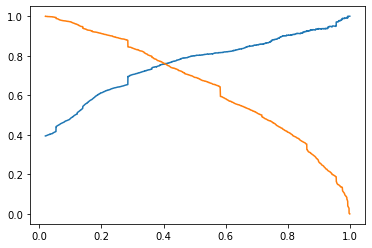

In [137]:
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])
plt.show()

## 7.2. Making predictions on the test set

In [138]:
#Scaling the test data

x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [139]:
#Assigning columns to the x_test

x_test = x_test[col6]
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0


In [140]:
#Adding a const

x_test_sm = sm.add_constant(x_test)

#Making predictions

y_test_pred = result7.predict(x_test_sm)
y_test_pred[:10]

3271    0.167123
1490    0.974510
7936    0.144663
4216    0.716308
3830    0.128862
1800    0.664682
6507    0.324967
4821    0.300637
4223    0.955888
4714    0.362261
dtype: float64

In [141]:
#Converting y_test_pred, y_test to dataframe

y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [142]:
#Putting Prospect_ID to index

y_test_df['Prospect_ID'] = y_test_df.index

In [143]:
#Removing index for both dataframes to append them

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
#Appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Prospect_ID,0
0,0,3271,0.167123
1,1,1490,0.974510
2,0,7936,0.144663
3,1,4216,0.716308
4,0,3830,0.128862


In [145]:
#Renaming

y_pred_final = y_pred_final.rename(columns={0:'Converted_probability'})
y_pred_final.head()

,Converted,Prospect_ID,Converted_probability
0,0,3271,0.167123
1,1,1490,0.974510
2,0,7936,0.144663
3,1,4216,0.716308
4,0,3830,0.128862


In [146]:
y_pred_final['Final_prediction'] = y_pred_final.Converted_probability.map(lambda x:1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Prospect_ID,Converted_probability,Final_prediction
0,0,3271,0.167123,0
1,1,1490,0.974510,1
2,0,7936,0.144663,0
3,1,4216,0.716308,1
4,0,3830,0.128862,0


In [147]:
#Checking the overall accuracy

print('Accuracy: ', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_prediction))

Accuracy:  0.8027910392948954


In [148]:
#Checking confusion matrix

cm3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_prediction)
cm3

array([[1405,  329],
       [ 208,  781]])

In [149]:
TP3 = cm3[1,1] # true positive 
TN3 = cm3[0,0] # true negatives
FP3 = cm3[0,1] # false positives
FN3 = cm3[1,0] # false negatives

In [150]:
#Sensitivity of logistic regression model

print('Sensitivity: ', TP3/float(TP3+FN3))

Sensitivity:  0.7896865520728008


In [151]:
#Specificity of logistic regression model

print('Specificity: ', TN3/float(TN3+FP3))

Specificity:  0.8102652825836217


In [152]:
#Assigning Lead Score to the Testing data

y_pred_final['Score'] = y_pred_final.Converted_probability.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect_ID,Converted_probability,Final_prediction,Score
0,0,3271,0.167123,0,17
1,1,1490,0.974510,1,97
2,0,7936,0.144663,0,14
3,1,4216,0.716308,1,72
4,0,3830,0.128862,0,13


# VIII. Findings

## 8.1. Train vs Test Model:

**Train Data:**
- Accuracy : 80.9 %
- Sensitivity : 80.4 %
- Specificity : 81.2 %

**Test Data:**
- Accuracy : 80.3 %
- Sensitivity : 79.0 %
- Specificity : 81.3 %

=> This is a good model which can predict the Conversion Rate well. The CEO has now strong confidence in making strategic decision as the model has given a ballpark of the target lead conversion rate to be around 80%.

## 8.2. Potential leads:

Let's define our hot leads with the Score >=85

In [153]:
hot_leads = y_pred_final.loc[y_pred_final['Score']>=85]
hot_leads

,Converted,Prospect_ID,Converted_probability,Final_prediction,Score
1,1,1490,0.974510,1,97
8,1,4223,0.955888,1,96
21,1,2461,0.992867,1,99
23,1,5822,0.997135,1,100
25,1,2684,0.997135,1,100
...,...,...,...,...,...
2694,1,1566,0.956206,1,96
2699,1,6461,0.911449,1,91
2703,1,5741,0.907715,1,91
2715,1,6299,0.902959,1,90


There are 364 hot leads which should be contacted as they are more likely to be converted.

In [154]:
#Finding Prospect ID of hot leads

hot_leads_id = hot_leads['Prospect_ID'].values.reshape(-1)
hot_leads_id

array([1490, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518, 4543,
       4830, 4365, 3542, 7674, 8596, 4003, 4963, 6947, 4807,  446,  789,
       8372, 5805, 3758,  337, 1561,  737, 6423, 8286, 7174, 4461, 1436,
       7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490, 1995, 6532,
       4498, 5797, 8687, 7653,   76, 2018, 6743, 3703, 3976, 5769, 1663,
       3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481, 3265, 3285,
       7433, 3858, 8106, 8207,  373, 7417, 4179, 4994, 8568, 7268, 5141,
       6784, 6754, 2960, 7753, 3983, 4487,  802, 8745, 4455, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 6499, 2481, 3439, 4612, 4793, 1557, 2495,  822, 8111,
       2378, 5075,  855, 7699, 5638, 2342, 8077, 2727,  720, 7489,  941,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 5135, 2427, 5087,
        174, 2674, 8065, 1568, 8597, 4865, 4708, 1304, 6066, 6538, 5700,
       1388, 5815, 7970, 7902, 5804, 5042, 4081, 66

## 8.3. Top variables contribute most towards the  converted probability

In [155]:
result7.params.sort_values(ascending = False)

Lead Source_Welingak Website                            5.613225
Lead Source_Reference                                   3.753300
Last Activity_Had a Phone Conversation                  2.868155
What is your current occupation_Working Professional    2.776517
Last Activity_SMS Sent                                  1.252101
Total Time Spent on Website                             1.122464
Lead Source_Olark Chat                                  1.009413
Lead Origin_Landing Page Submission                    -0.319320
Last Notable Activity_Modified                         -0.897592
const                                                  -0.932008
Last Activity_Olark Chat Conversation                  -1.053587
Do Not Email                                           -1.508794
dtype: float64

**Recommendations:**

*X Education should target those groups of customers who have high chance to be converted:*
    
- Calls leads coming from the lead sources 'Welingak Websites', 'Reference', and 'Olark Chat'
- Calls leads whose last activity was 'Phone Conversation' and 'SMS Sent'
- Calls leads who are the 'Working Professionals'
- Calls leads who spent more time on the websites ('Total Time Spent on Website')

*X Education should NOT focus on those groups of customers who have low chance to be converted:*

- Whose lead origin is 'Landing Page Submission'
- Whose last notable activity is 'Modified'
- Whose last activity was 'Olark Chat Conversation'
- Whose do not want to receive emails ('Do Not Email')